In [11]:
import pandas as pd
from sklearn.cross_validation import train_test_split
import numpy as np
data = pd.read_csv("Matchup.csv")


#data['PointDiff'] = data.PointDiff < 11
#data['PointDiff'] = pd.get_dummies(data.PointDiff)

In [12]:
data.head()

,Season,Daynum,WinLoss,Wteam,Wscore,Lteam,Lscore,Wloc,Numot,PointDiff,...,Losses,FieldGoalAvg,ThreePointAvg,FreeThrowAvg,ReboundAvg,AssistAvg,TurnOverAvg,StealAvg,BlockAvg,PersonalFoulAvg
0,2003,134,1,1421,92,1411,84,N,1,8,...,4,-0.018262,0.039432,0.142816,-2.51839,-1.16552,0.97357,0.635633,0.766667,0.80345
1,2003,136,1,1112,80,1436,51,N,0,29,...,-7,0.016969,0.009777,0.043581,4.13177,3.43596,0.71674,1.602217,1.248769,1.85345
2,2003,138,1,1112,96,1211,95,N,2,1,...,-5,-0.008628,-0.025101,-0.019775,5.56337,1.90092,0.23732,1.657834,0.698157,-0.89516
3,2003,143,1,1112,88,1323,71,N,0,17,...,-6,0.012715,-0.030207,-0.058458,4.56337,0.73963,2.01152,1.012673,-1.430875,1.52419
4,2003,136,1,1113,84,1272,71,N,0,13,...,5,0.040251,-0.030989,0.016123,-3.03448,-1.06897,0.20690,-2.172413,-0.827587,0.65517


In [19]:
from sklearn.tree import DecisionTreeClassifier
features = ['AvgPointSpread', 'Wins', 'Losses', 'FieldGoalAvg','ThreePointAvg','FreeThrowAvg','ReboundAvg','AssistAvg','TurnOverAvg','StealAvg','BlockAvg','PersonalFoulAvg']
X = data[features].values
y = data['WinLoss'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
clf = DecisionTreeClassifier(max_depth = 5)
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [20]:
from sklearn.tree import export_graphviz
export_graphviz(clf, out_file='tree.dot', feature_names=features)

In [21]:
!dot -Tpng tree.dot -o MatchupTree.png

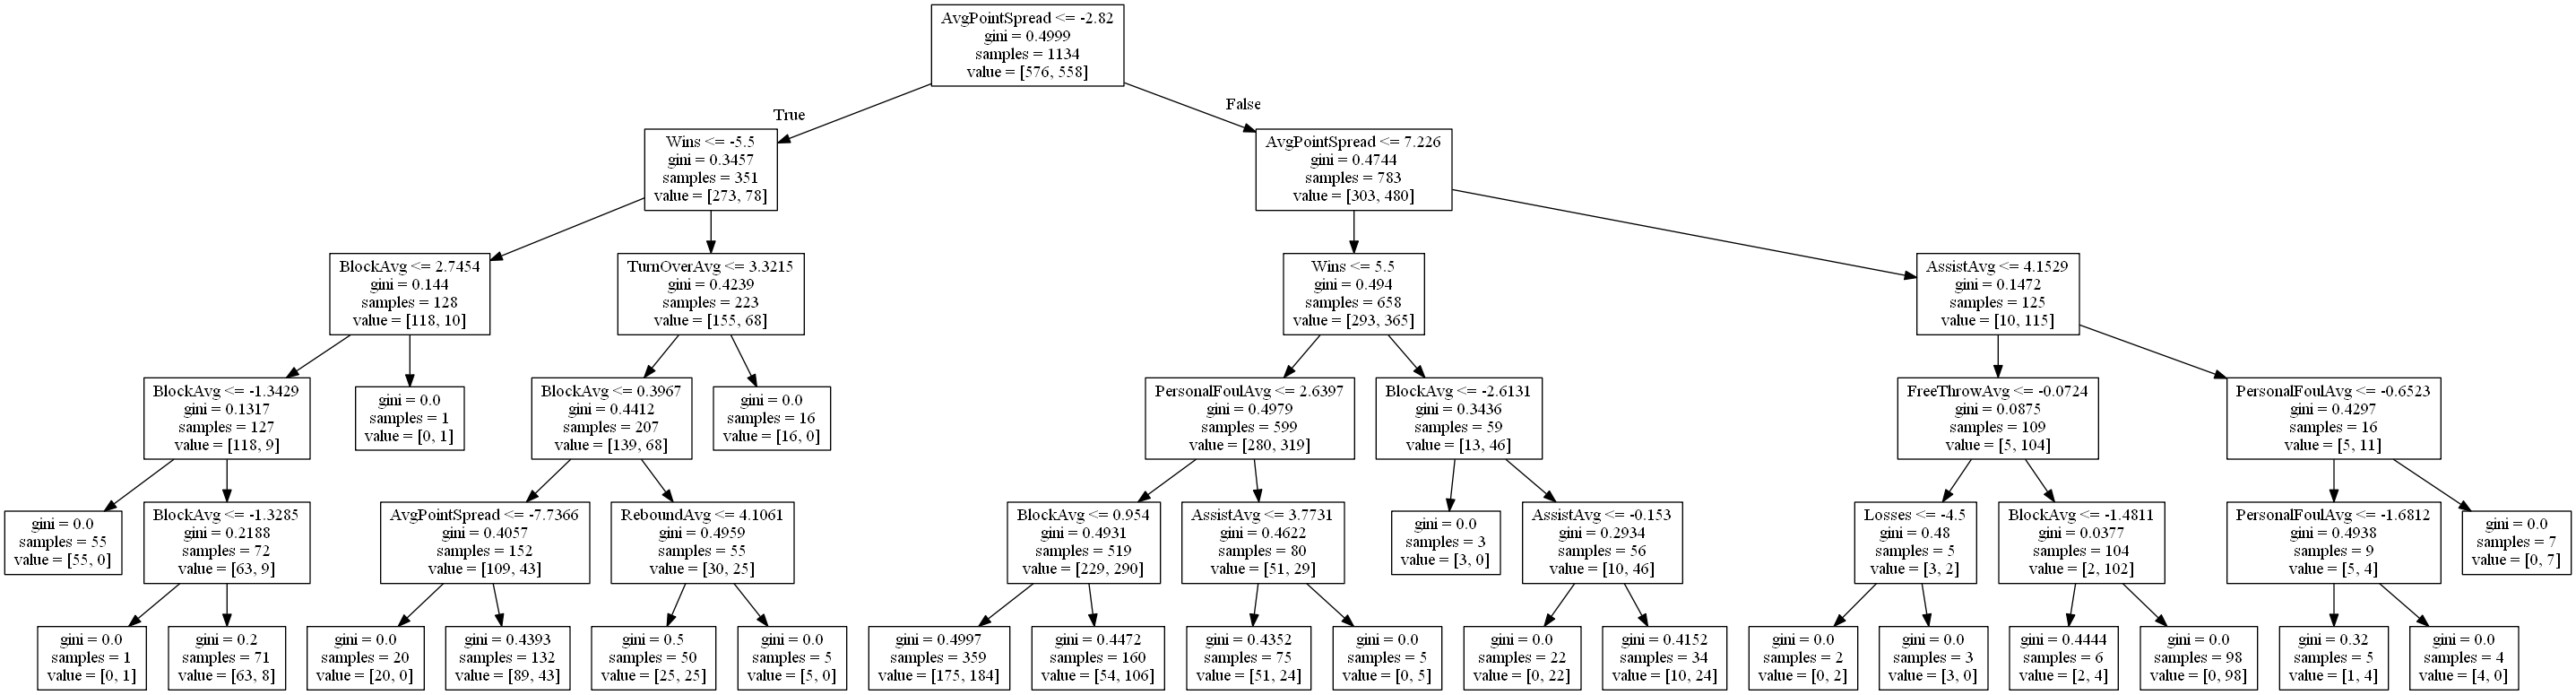

In [22]:
from IPython.display import Image
Image(filename='MatchupTree.png') 